### Italian Houses Dataset in 2023
- dataset : https://www.kaggle.com/datasets/alessandrolobello/italian-houses-dataset-2023

- Features

1. Price(€)
2. Rooms
3. mq : house square meters
4. Type : house tipe, should be 1 ,2 or 3
5. Desc : the house description in Italian
6. City
7. Street

#### 1. Les données

#### 1.1 Chargement des données

In [273]:
import pandas as pd

In [274]:
df = pd.read_csv('Italian_house_price.csv')
print(df.shape)
df.head()

(15998, 8)


,Price(€),Rooms,mq,Type,Desc,City,Zone,Street
0,142000.0,4,130,1,"In via Ettore Vitale, strada principale del qu...",Catanzaro,Pontegrande - Sant'Elia,"Via Ettore Vitale, 12"
1,249000.0,4,108,1,Rif: PRQUAD - La Tempocasa di Cagliari San Ben...,Cagliari,San Benedetto,Via Giovan Battista Pergolesi
2,495000.0,5,117,2,Living Alberione: Luminoso attico collocato al...,Trento,San Pio X,via alberione
3,89000.0,3,93,1,"Cornigliano/Coronata parte alta, Via Paradisio...",Genova,Cornigliano,Via Paradiso
4,495000.0,5,89,2,In Vendita Loft/Mansarda a Venezia Sestiere di...,Venezia,Arsenale - Giardini della Biennale,CASTELLO


In [275]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15998 entries, 0 to 15997
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price(€)  15998 non-null  float64
 1   Rooms     15998 non-null  int64  
 2   mq        15998 non-null  int64  
 3   Type      15998 non-null  int64  
 4   Desc      15993 non-null  object 
 5   City      15998 non-null  object 
 6   Zone      15998 non-null  object 
 7   Street    15998 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1000.0+ KB


In [276]:
data = df.iloc[:,0:4]
data.head()

,Price(€),Rooms,mq,Type
0,142000.0,4,130,1
1,249000.0,4,108,1
2,495000.0,5,117,2
3,89000.0,3,93,1
4,495000.0,5,89,2


In [277]:
data['Type'].value_counts()

Type
1    8423
2    5816
3    1759
Name: count, dtype: int64

In [278]:
new_columns = [1,2,3]

existing_new_columns = set(data.columns)
new_columns = [col for col in new_columns if col not in existing_new_columns]

if new_columns:
    one_hot_colonnes = pd.get_dummies(data['Type'],dtype=int)
    data = pd.concat([data,one_hot_colonnes],axis=1)
    data = data.drop(['Type'],axis=1)
    print('done')
else: 
    print('already done')

done


In [279]:
data.head()

,Price(€),Rooms,mq,1,2,3
0,142000.0,4,130,1,0,0
1,249000.0,4,108,1,0,0
2,495000.0,5,117,0,1,0
3,89000.0,3,93,1,0,0
4,495000.0,5,89,0,1,0


#### 1.2 Exploration des données

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
# Ignorer les warning
import warnings
warnings.filterwarnings('ignore')

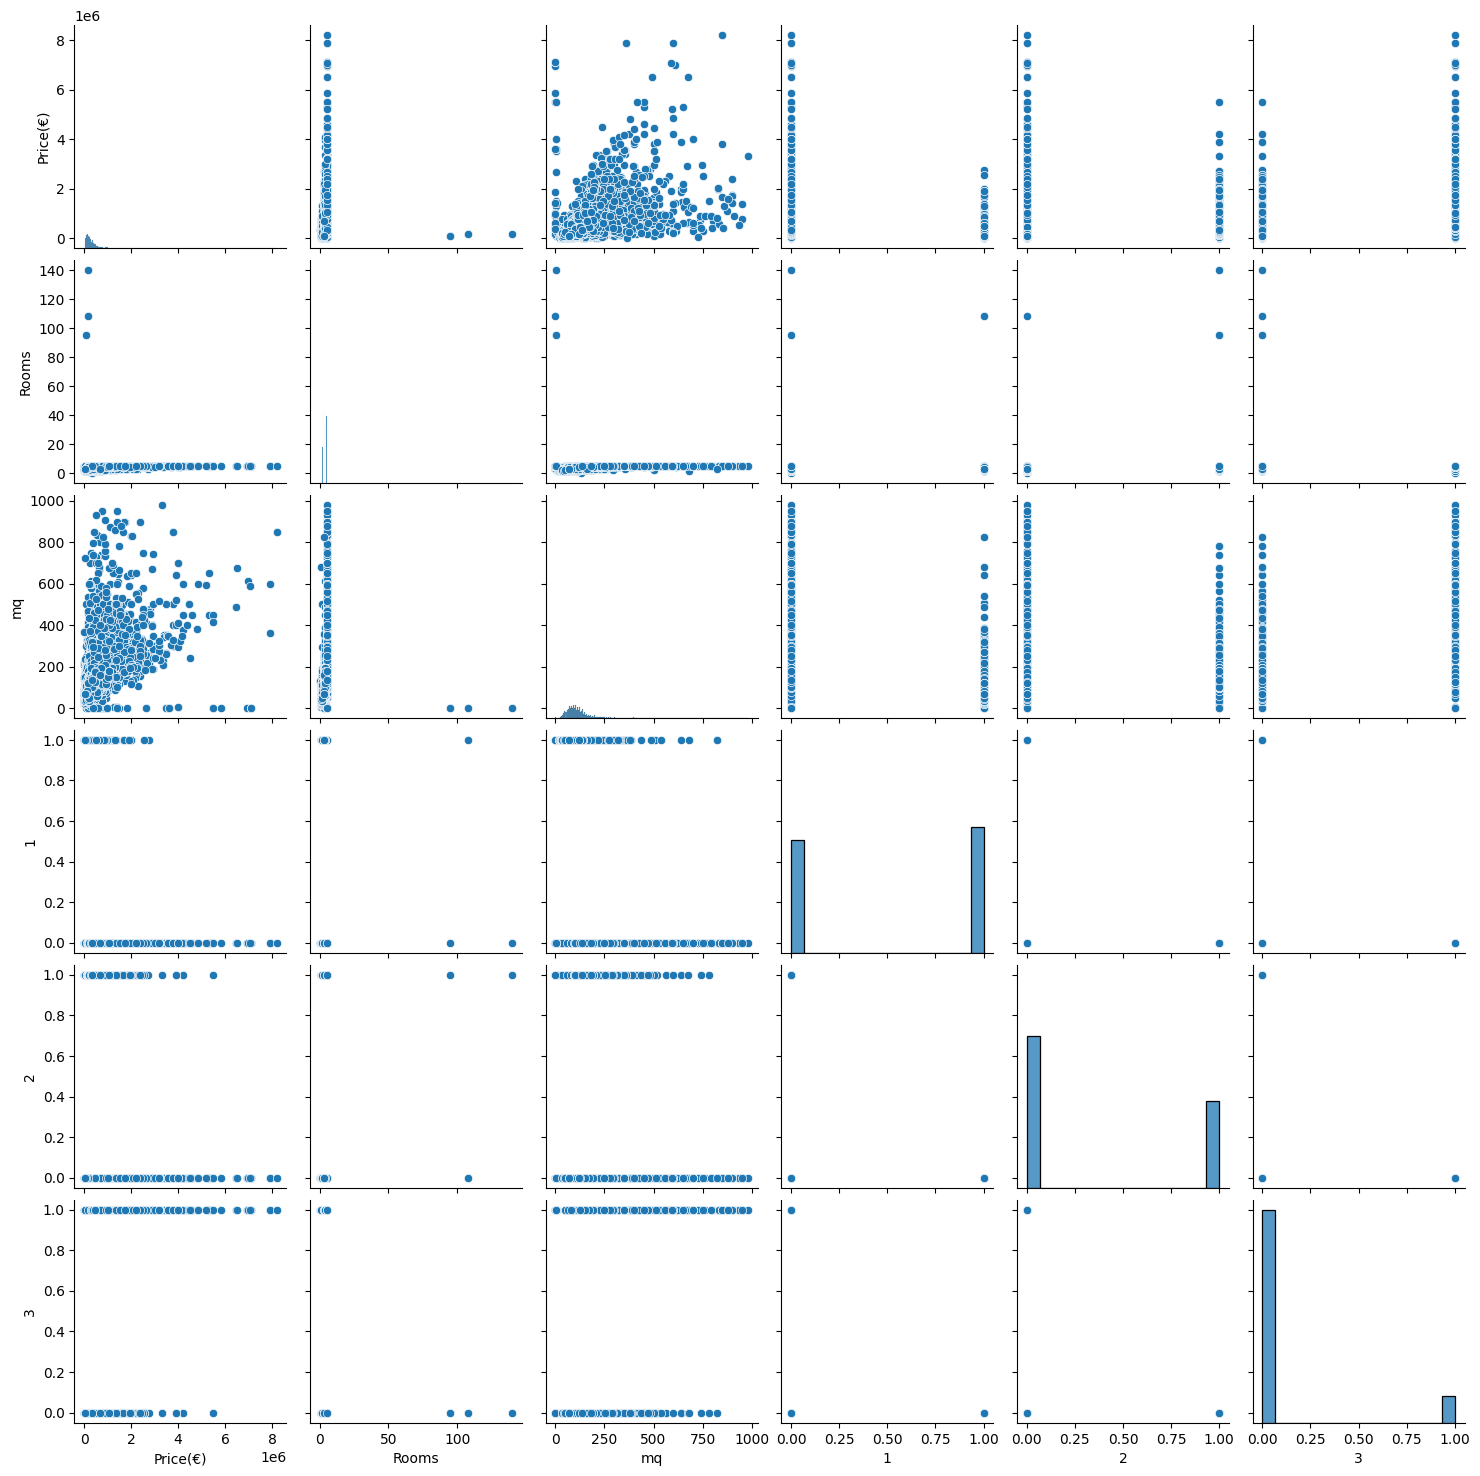

In [282]:
sns.pairplot(data);

In [283]:
data.describe().round(2)

,Price(€),Rooms,mq,1,2,3
count,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00
mean,356421.62,3.63,121.18,0.53,0.36,0.11
std,442489.50,1.90,81.14,0.50,0.48,0.31
min,1.00,0.00,1.00,0.00,0.00,0.00
25%,135000.00,3.00,75.00,0.00,0.00,0.00
50%,240000.00,4.00,101.00,1.00,0.00,0.00
75%,410000.00,5.00,140.00,1.00,1.00,0.00
max,8200000.00,140.00,980.00,1.00,1.00,1.00


<Axes: ylabel='Rooms'>

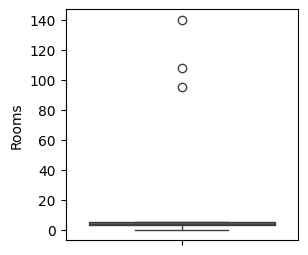

In [284]:
# on regarde des données aberrantes dans le categorie Rooms
plt.figure(figsize=(3,3))
sns.boxplot(data.Rooms)

In [285]:
data['Rooms'].describe().round(2)

count    15998.00
mean         3.63
std          1.90
min          0.00
25%          3.00
50%          4.00
75%          5.00
max        140.00
Name: Rooms, dtype: float64

In [286]:
# filtrage des données aberrantes dans le catégorie Rooms
data = data[data['Rooms']<=20]
data.shape

(15995, 6)

<Axes: ylabel='Rooms'>

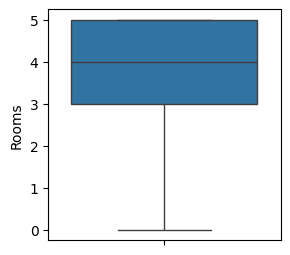

In [287]:
plt.figure(figsize=(3,3))
sns.boxplot(data.Rooms)

<Axes: xlabel='Price(€)', ylabel='Rooms'>

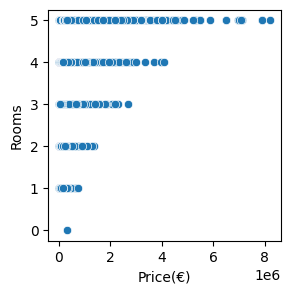

In [288]:
plt.figure(figsize=(3,3))
sns.scatterplot(x=data['Price(€)'],y=data['Rooms'])

#### 1.3 Répartition Entrenaînement / Test (Train / Test)

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
# Features (ou caractéristiques)
X = data.drop('Price(€)',axis=1).values
# Label (ou étiquette)
y = data['Price(€)'].values

# usamos extension values para extraer los valores en un arreglo numpy sin que altere nada en data

# Split (séparation / répartition)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)


In [291]:
X_train.shape

(12796, 5)

In [292]:
X_test.shape

(3199, 5)

In [293]:
y_train.shape

(12796,)

In [294]:
y_test.shape

(3199,)

#### 1.4 Normalisation et mise à l'echelle des données

In [295]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [296]:
#scaler = MinMaxScaler()
scaler = StandardScaler()

In [297]:
#scaler.fit(X_train)

In [298]:
#X_train = scaler.transform(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2. Création du modèle

In [299]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

In [300]:
#model = Sequential()

#model.add(Dense(4,activation= 'relu'))
#model.add(Dense(4,activation= 'relu'))
#model.add(Dense(4,activation= 'relu'))

#model.add(Dense(1))

#model.compile(optimizer='rmsprop', loss='mse')

In [301]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Creación del modelo
model = Sequential()

# Capas ocultas con regularización L2
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Capa de salida
model.add(Dense(1))  # Capa de salida para regresión

# Compilación del modelo
model.compile(optimizer='adam', loss='mse')  # Optimizador Adam y función de pérdida Mean Squared Error (MSE)

#### 2.1 Entraînement

In [302]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
400/400 [==============================] - 1s 1ms/step - loss: 317580607488.0000
Epoch 2/250
283/400 [====================>.........] - ETA: 0s - loss: 284480372736.0000

400/400 [==============================] - 0s 1ms/step - loss: 273793712128.0000
Epoch 3/250
400/400 [==============================] - 1s 1ms/step - loss: 165341446144.0000
Epoch 4/250
400/400 [==============================] - 0s 650us/step - loss: 133728067584.0000
Epoch 5/250
400/400 [==============================] - 0s 705us/step - loss: 131622264832.0000
Epoch 6/250
400/400 [==============================] - 0s 738us/step - loss: 130823258112.0000
Epoch 7/250
400/400 [==============================] - 0s 963us/step - loss: 130318614528.0000
Epoch 8/250
400/400 [==============================] - 1s 1ms/step - loss: 129882324992.0000
Epoch 9/250
400/400 [==============================] - 0s 1ms/step - loss: 129543675904.0000
Epoch 10/250
400/400 [==============================] - 0s 859us/step - loss: 129197096960.0000
Epoch 11/250
400/400 [==============================] - 0s 805us/step - loss: 128969424896.0000
Epoch 12/250
400/400 [==============================] - 0s 1ms/step 

#### 2.2 Évaluation

In [303]:
model.history.history

{'loss': [317580607488.0,
  273793712128.0,
  165341446144.0,
  133728067584.0,
  131622264832.0,
  130823258112.0,
  130318614528.0,
  129882324992.0,
  129543675904.0,
  129197096960.0,
  128969424896.0,
  128715227136.0,
  128543113216.0,
  128415342592.0,
  128285474816.0,
  128181149696.0,
  128081453056.0,
  127936692224.0,
  127888244736.0,
  127869124608.0,
  127840657408.0,
  127717343232.0,
  127623102464.0,
  127681609728.0,
  127610208256.0,
  127572992000.0,
  127552749568.0,
  127543164928.0,
  127543156736.0,
  127491833856.0,
  127454814208.0,
  127406096384.0,
  127467798528.0,
  127420841984.0,
  127460687872.0,
  127369338880.0,
  127409782784.0,
  127388229632.0,
  127391399936.0,
  127370862592.0,
  127378415616.0,
  127376596992.0,
  127361163264.0,
  127335514112.0,
  127368822784.0,
  127374008320.0,
  127314558976.0,
  127368708096.0,
  127323136000.0,
  127355158528.0,
  127350202368.0,
  127332270080.0,
  127320670208.0,
  127304843264.0,
  127353577472.0,
  

In [304]:
loss = model.history.history['loss']

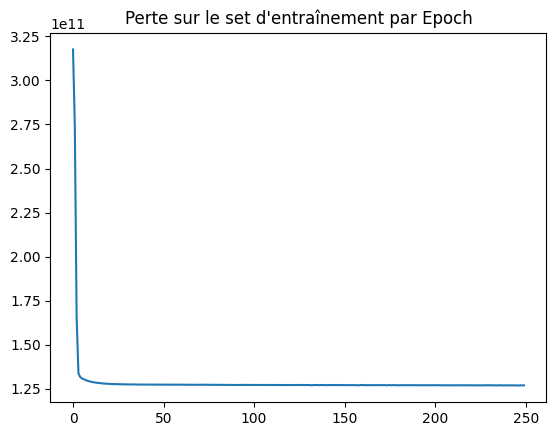

In [305]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Perte sur le set d'entraînement par Epoch");

#### Comparation de l'évaluation finale (MSE) sur le set d'entraînement et le set de test

In [306]:
model.metrics_names

['loss']

In [307]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(training_score)
print(test_score)

126821490688.0
136637661184.0


#### Évaluations complémentaires

In [308]:
test_predictions = model.predict(X_test)
test_predictions#[1:10]

100/100 [==============================] - 0s 1ms/step


array([[185973.62],
       [152492.1 ],
       [152492.1 ],
       ...,
       [174984.08],
       [748210.94],
       [359012.8 ]], dtype=float32)

In [309]:
pred_data = pd.DataFrame(y_test, columns=['Test Y'])
pred_data

,Test Y
0,130000.0
1,109000.0
2,145000.0
3,67000.0
4,210000.0
...,...
3194,52000.0
3195,279000.0
3196,138000.0
3197,1350000.0


In [310]:
test_predictions = pd.Series(test_predictions.reshape(3199,))
test_predictions

0       185973.625000
1       152492.093750
2       152492.093750
3       183777.406250
4       186949.484375
            ...      
3194    166986.546875
3195    196465.593750
3196    174984.078125
3197    748210.937500
3198    359012.812500
Length: 3199, dtype: float32

In [311]:
pred_data = pd.concat([pred_data,test_predictions], axis=1)

In [312]:
pred_data.columns = ['Test Y','Model Predictions']
pred_data

,Test Y,Model Predictions
0,130000.0,185973.625000
1,109000.0,152492.093750
2,145000.0,152492.093750
3,67000.0,183777.406250
4,210000.0,186949.484375
...,...,...
3194,52000.0,166986.546875
3195,279000.0,196465.593750
3196,138000.0,174984.078125
3197,1350000.0,748210.937500


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

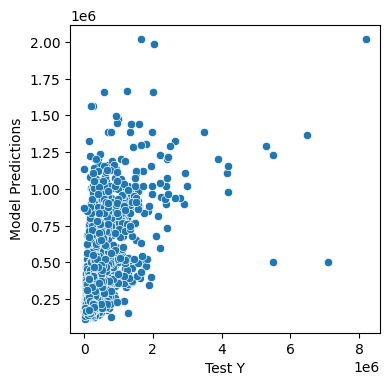

In [313]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_data)

In [314]:
pred_data['Error'] = pred_data['Test Y'] - pred_data['Model Predictions']

<Axes: xlabel='Error', ylabel='Density'>

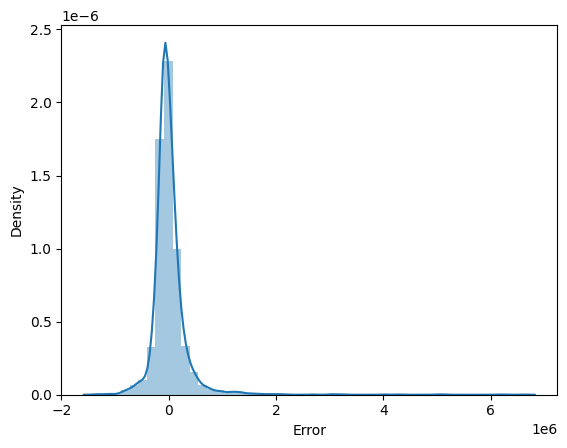

In [315]:
sns.distplot(pred_data['Error'],bins=50)

In [316]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [317]:
mean_absolute_error(pred_data['Test Y'],pred_data['Model Predictions'])

183898.22890356363

In [318]:
mean_squared_error(pred_data['Test Y'],pred_data['Model Predictions'])

136637628205.60832

In [319]:
test_score

136637661184.0

In [320]:
test_score*0.5

68318830592.0